In [4]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from datetime import datetime
import numpy as np
import os

In [5]:
MATH_DATASET_URL = "./student_math.csv"
PORT_DATASET_URL = "./student_portuguese.csv"
FEATURES = [
	"school",
	"sex",
	"age",
	"address",
	"famsize",
	"pstatus",
	"medu",
	"fedu",
	"mjob",
	"fjob",
	"reason",
	"guardian",
	"traveltime",
	"studytime",
	"failures",
	"schoolsup",
	"famsup",
	"paid",
	"activities",
	"nursery",
	"higher",
	"internet",
	"romantic",
	"famrel",
	"freetime",
	"goout",
	"dalc",
	"walc",
	"health",
	"absences",
	"g1",
	"g2"
]
LABEL = "g3"
COLUMNS = FEATURES + [LABEL]
DTYPE={
	"school": "category",
	"sex": "category",
	"age": "float32",
	"address": "category",
	"famsize": "category",
	"pstatus": "category",
	"medu": "category",
	"fedu": "category",
	"mjob": "category",
	"fjob": "category",
	"reason": "category",
	"guardian": "category",
	"traveltime": "category",
	"studytime": "category",
	"failures": "category",
	"schoolsup": "category",
	"famsup": "category",
	"paid": "category",
	"activities": "category",
	"nursery": "category",
	"higher": "category",
	"internet": "category",
	"romantic": "category",
	"famrel": "category",
	"freetime": "category",
	"goout": "category",
	"dalc": "category",
	"walc": "category",
	"health": "category",
	"absences": "float32",
	"g1": "float32",
	"g2": "float32",
	"g3": "float32"
}
TEST_SET_SIZE=0.2
SHUFFLE_SIZE=512
BATCH_SIZE=50
SEED=1
COLUMNS

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'pstatus',
 'medu',
 'fedu',
 'mjob',
 'fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'dalc',
 'walc',
 'health',
 'absences',
 'g1',
 'g2',
 'g3']

In [6]:
tf.random.set_seed(SEED)
random.seed(SEED)

In [7]:
math_data = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), MATH_DATASET_URL), names=COLUMNS, dtype=DTYPE, index_col=False, skipinitialspace=True, skiprows=1, delimiter=";")
port_data = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), PORT_DATASET_URL), names=COLUMNS, dtype=DTYPE, index_col=False, skipinitialspace=True, skiprows=1, delimiter=";")

In [8]:
math_data.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6.0,5.0,6.0,6.0
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4.0,5.0,5.0,6.0
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7.0,8.0,10.0
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15.0,14.0,15.0
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6.0,10.0,10.0


In [9]:
port_data.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4.0,0.0,11.0,11.0
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2.0,9.0,11.0,11.0
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6.0,12.0,13.0,12.0
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0.0,14.0,14.0,14.0
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0.0,11.0,13.0,13.0


In [10]:
FEATURES = FEATURES + ['subject']
COLUMNS = COLUMNS + ['subject']

math_data['subject'] = 'math'
port_data['subject'] = 'portuguese'

data = math_data.append(port_data)
data['subject'] = data['subject'].astype("category")
data = data.reset_index(drop=True)
data.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,freetime,goout,dalc,walc,health,absences,g1,g2,g3,subject
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6.0,5.0,6.0,6.0,math
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4.0,5.0,5.0,6.0,math
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10.0,7.0,8.0,10.0,math
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2.0,15.0,14.0,15.0,math
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4.0,6.0,10.0,10.0,math


In [11]:
# Drop columns
DROP_COLUMNS = ["g1", "g2"]

for column in DROP_COLUMNS:
	data = data.drop(column, axis=1)
	FEATURES.remove(column)
	COLUMNS.remove(column)
	DTYPE.pop(column)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      1044 non-null   category
 1   sex         1044 non-null   category
 2   age         1044 non-null   float32 
 3   address     1044 non-null   category
 4   famsize     1044 non-null   category
 5   pstatus     1044 non-null   category
 6   medu        1044 non-null   category
 7   fedu        1044 non-null   category
 8   mjob        1044 non-null   category
 9   fjob        1044 non-null   category
 10  reason      1044 non-null   category
 11  guardian    1044 non-null   category
 12  traveltime  1044 non-null   category
 13  studytime   1044 non-null   category
 14  failures    1044 non-null   category
 15  schoolsup   1044 non-null   category
 16  famsup      1044 non-null   category
 17  paid        1044 non-null   category
 18  activities  1044 non-null   category
 19  nurser

In [13]:
# Missing values
data = data.dropna()
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
dalc          0
walc          0
health        0
absences      0
g3            0
subject       0
dtype: int64

In [14]:
# Normalise Features
for feature in FEATURES:
    if data[feature].dtype == "float32":
        # min_max_scaler = preprocessing.MinMaxScaler()
        # data[[feature]] = min_max_scaler.fit_transform(data[[feature]])
        standard_scaler = preprocessing.StandardScaler()
        data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,age,absences,g3
count,1.044000e+03,1.044000e+03,1044.000000
mean,1.701359e-08,-4.396128e-09,11.341954
std,1.000479e+00,1.000479e+00,3.864796
min,-1.392674e+00,-7.144895e-01,0.000000
25%,-5.858197e-01,-7.144895e-01,10.000000
50%,2.210349e-01,-3.922748e-01,11.000000
75%,1.027889e+00,2.521546e-01,14.000000
max,4.255308e+00,1.136856e+01,20.000000


In [15]:
# Normalise Label
min_max_scaler = preprocessing.MinMaxScaler()
data[[LABEL]] = min_max_scaler.fit_transform(data[[LABEL]])
# standard_scaler = preprocessing.StandardScaler()
# data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,age,absences,g3
count,1.044000e+03,1.044000e+03,1044.000000
mean,1.701359e-08,-4.396128e-09,0.567098
std,1.000479e+00,1.000479e+00,0.193240
min,-1.392674e+00,-7.144895e-01,0.000000
25%,-5.858197e-01,-7.144895e-01,0.500000
50%,2.210349e-01,-3.922748e-01,0.550000
75%,1.027889e+00,2.521546e-01,0.700000
max,4.255308e+00,1.136856e+01,1.000000


In [16]:
# Set categories
for column in COLUMNS:
	if data[column].dtype.name == "category":
		labelencoder = preprocessing.LabelEncoder()
		data[column] = labelencoder.fit_transform(data[column])
		categories=data[column].unique()
		data[column] = data[column].astype(pd.CategoricalDtype(categories=categories))
		print(data[column].cat.categories.tolist())

[0, 1]
[0, 1]
[1, 0]
[0, 1]
[0, 1]
[4, 1, 3, 2, 0]
[4, 1, 2, 3, 0]
[0, 1, 2, 3, 4]
[4, 2, 3, 1, 0]
[0, 2, 1, 3]
[1, 0, 2]
[1, 0, 2, 3]
[1, 2, 0, 3]
[0, 3, 2, 1]
[1, 0]
[0, 1]
[0, 1]
[0, 1]
[1, 0]
[1, 0]
[0, 1]
[0, 1]
[3, 4, 2, 0, 1]
[2, 1, 3, 0, 4]
[3, 2, 1, 0, 4]
[0, 1, 4, 2, 3]
[0, 2, 1, 3, 4]
[2, 4, 0, 1, 3]
[0, 1]


In [17]:
data = data.astype(dtype=DTYPE)
data.dtypes

school        category
sex           category
age            float32
address       category
famsize       category
pstatus       category
medu          category
fedu          category
mjob          category
fjob          category
reason        category
guardian      category
traveltime    category
studytime     category
failures      category
schoolsup     category
famsup        category
paid          category
activities    category
nursery       category
higher        category
internet      category
romantic      category
famrel        category
freetime      category
goout         category
dalc          category
walc          category
health        category
absences       float32
g3             float32
subject       category
dtype: object

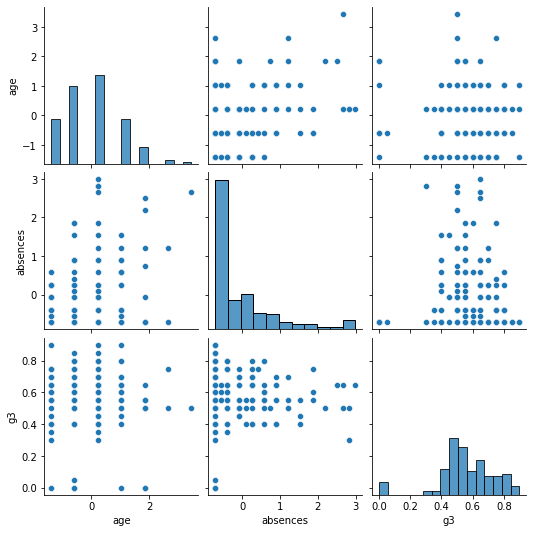

In [18]:
sns.pairplot(data.sample(n=150, random_state=1))

In [19]:
target = data.pop(LABEL)
target

0       0.30
1       0.30
2       0.50
3       0.75
4       0.50
        ... 
1039    0.50
1040    0.80
1041    0.45
1042    0.50
1043    0.55
Name: g3, Length: 1044, dtype: float32

In [20]:
data = pd.get_dummies(data, dtype="float32")
data

,age,absences,school_0,school_1,sex_0,sex_1,address_1,address_0,famsize_0,famsize_1,...,walc_1,walc_3,walc_4,health_2,health_4,health_0,health_1,health_3,subject_0,subject_1
0,1.027889,0.252155,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.221035,-0.070060,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.392674,0.896584,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.392674,-0.392275,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.585820,-0.070060,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1.834744,-0.070060,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1040,1.027889,-0.070060,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1041,1.027889,0.252155,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1042,0.221035,0.252155,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [21]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=TEST_SET_SIZE)

# Set training dataset
train = tf.data.Dataset.from_tensor_slices(
		(train_x.values, train_y.values))
train = train.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
train = train.batch(BATCH_SIZE)

# Set testing dataset
test = tf.data.Dataset.from_tensor_slices(
		(test_x.values, test_y.values))
test = test.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
test = test.batch(BATCH_SIZE)